# Data science is OSEMN

* OSEMN is an acronym that rhymes with “possum” or “awesome” and stands for Obtain, Scrub, Explore, Model, and Interpret. It is a list of tasks a data scientist should be familiar and comfortable working on. In addition to a list of tasks, OSEMN can be used as a blueprint for working on data problems using machine learning tools. From the process, the authors point out that data hacking fits into the “O” and “S” tasks and machine learning fits into the “E” and “M” tasks, and that data science requires a combination of all elements.

* O — Obtaining our data
* S — Scrubbing / Cleaning our data
* E — Exploring / Visualizing our data will allow us to find patterns and trends
* M — Modeling our data will give us our predictive power as a wizard
* N — iNterpreting our data

* Obtaining : You must identify all of your available datasets (which can be from the internet or external/internal databases). You must extract the data into a usable format (.csv, json, xml, etc..)
* Scrubbing : Examine the data: understand every feature you’re working with, identify errors, missing values, and corrupt records + Clean the data: throw away, replace, and/or fill missing values/errors
* Exploring : Explore in this case refers to exploratory data analysis. Data exploration is useful for getting to know your data, for building an intuition for it’s form and for getting ideas for data transforms and even predictive models to use later on in the process.
* Modeling : Model accuracy is often the ultimate goal for a given data problem. This means that the most predictive model is the filter by which a model is chosen.
* iNterpreting : Interpreting data refers to the presentation of your data to a non-technical layman. 

In [1]:
import numpy as np
#NumPy is a python library used for working with arrays.
#It also has functions for working in domain of linear algebra, fourier transform, and matrices.
#We have lists that serve the purpose of arrays, but they are slow.
#NumPy aims to provide an array object that is up to 50x faster that traditional Python lists.

import pandas as pd 
#Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:
#Calculate statistics and answer questions about the data, like: What's the average, median, max, or min of each column?
#Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
#Store the cleaned, transformed data back into a CSV, other file or database

import matplotlib.pyplot as plt
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import seaborn as sns

## OSEMN Exercises

### 1. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
#This program writes 1 line of 15 random integers, each in the range from 1-100 to a text file.
def main():
    import random
    #Open a file named numbersmake.txt.
    outfile = open('simple_data.txt', 'w')

    #Produce the numbers
    for count in range(15):
         num = random.randint(1, 100)   #Get a random number.
         outfile.write(str(num) + ' ')  #adds a space, unless you want the numbers to be all together

    outfile.write(str(num))
    outfile.close()
    print('Data written to simple_data.txt')

#Call the main function
main()
simple_data = open("simple_data.txt", "r")
print(simple_data.read())

Data written to simple_data.txt
73 29 64 48 80 16 89 100 96 86 51 42 15 68 70 70


### 2. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [10]:
import numpy as np
a=np.random.rand(5,5)
print(a)
for i in range(5):
    for j in range(5):
        file=open("data.txt","a")
        data=str(a[i][j])
        file.write(data)
        file.close()
    

[[0.13810563 0.4362008  0.77093922 0.40939129 0.213494  ]
 [0.3766269  0.67732721 0.96698091 0.71944899 0.98762805]
 [0.40623462 0.77216812 0.38430721 0.75383899 0.86573261]
 [0.16861692 0.30314421 0.22982024 0.1507054  0.20659434]
 [0.23519771 0.79219319 0.33779398 0.79972753 0.69144621]]


### 3. Load the saved txt file of point 2 and convert it to a csv file

In [12]:
import pandas as pd
read_file = pd.read_csv (r'C:\Users\recep.balibey\Desktop\HOME\Courses\HLP\04ex\simple_data.txt')
read_file.to_csv (r'C:\Users\recep.balibey\Desktop\HOME\Courses\HLP\04ex\new.csv', index=None)

# ----------------

import csv
with open('simple_data.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('log.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('title', 'intro'))
        writer.writerow(lines)

### 4. load the binary file named credit_card.dat and convert the data into the real credit-card number. Each line correspond to a credit card number. Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

In [14]:
file=open("credit_card.dat","r")
content=file.read()
file.close()
for i in content.splitlines():
    number=i
    if number=="100000":  #ASCII code for Space
        print(" ",end="")
    else:
        print(int(number, 2),end="")

2766 1900 1980 7826

### 5. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [24]:
import pandas as pd
df = pd.read_json (r'C:\Users\recep.balibey\Desktop\HOME\Courses\HLP\04ex\csvtojson.json')
df.to_csv (r'C:\Users\recep.balibey\Desktop\HOME\Courses\HLP\04ex\jsontocsv.csv', index = None)

###  6. Load the file from this url: https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1 with Pandas.

* Explore the data (see the info of the data)
* Draw the istogram of the 'class' field. Decribe wath yuou see

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

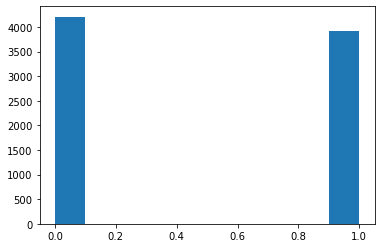

In [21]:
import pandas as pd 
data = pd.read_csv('mushrooms_categorized.csv')
print(data.info())
print(data.head())
plt.hist(data['class'])
plt.show()

### 7. Load the remote file https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1 with Pandas and plot a scatter plot all possible combination of the following fields:

* features_1
* features_2
* features_3

<Figure size 576x396 with 0 Axes>

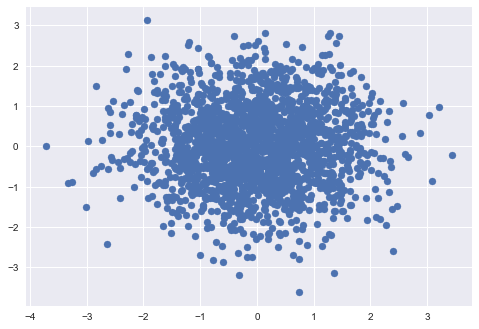

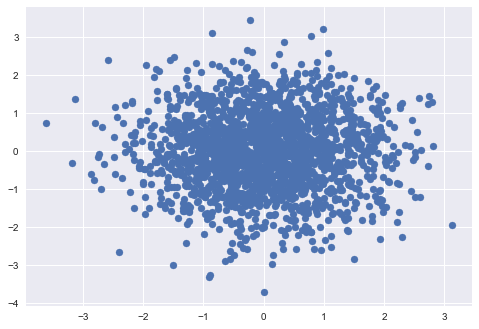

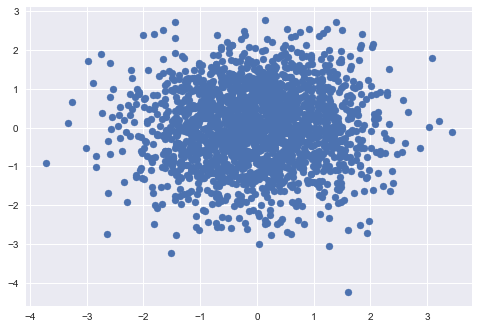

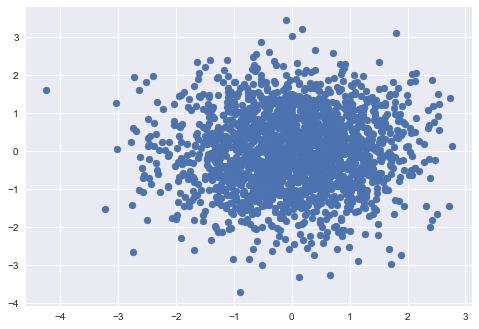

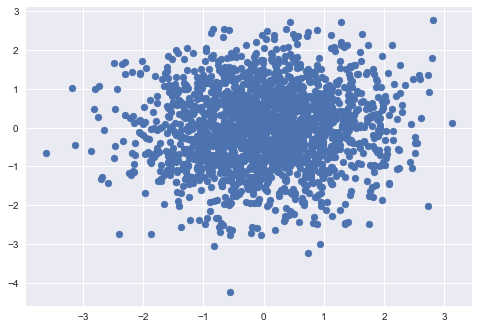

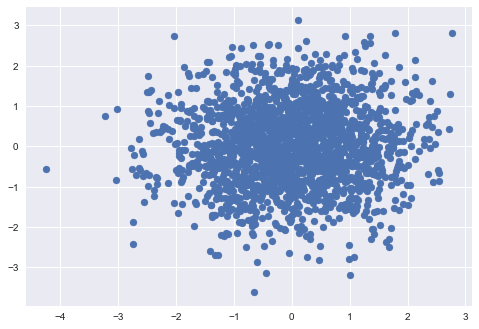

<Figure size 576x396 with 0 Axes>

In [22]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

df = pd.read_csv('regression_generated.csv')
plt.figure()

plt.scatter(df['features_1'],df['features_2'])
plt.figure()

plt.scatter(df['features_2'],df['features_1'])
plt.figure()

plt.scatter(df['features_1'],df['features_3'])
plt.figure()

plt.scatter(df['features_3'],df['features_1'])
plt.figure()

plt.scatter(df['features_2'],df['features_3'])
plt.figure()

plt.scatter(df['features_3'],df['features_2'])
plt.figure()

### 8. Load the same file of point 6, and convert the file to json with Pandas.

In [23]:
import pandas as pd
df = pd.read_csv (r'C:\Users\recep.balibey\Desktop\HOME\Courses\HLP\04ex\mushrooms_categorized.csv')
df.to_json (r'C:\Users\recep.balibey\Desktop\HOME\Courses\HLP\04ex\csvtojson.json')